<a href="https://colab.research.google.com/github/nunnaganapathi/Stock-Price-Prediction-BEML-and-Glaxo/blob/main/Ganapathi_Session2_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import important libraries
import pandas as pd
import numpy as np


In [3]:
#importing the data
beml_df=pd.read_csv('BEML.csv')
beml_df.head()
#glaxo_df=pd.read_csv('GLAXO.csv')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
#importing the data
glaxo_df=pd.read_csv('GLAXO.csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
#Filtering the required columns
beml_df=beml_df[['Date','Close']]
glaxo_df=glaxo_df[['Date','Close']]

In [6]:
#Getting the datatypes
beml_df.dtypes

,0
Date,object
Close,float64


In [7]:
#Getting the datatypes
glaxo_df.dtypes

,0
Date,object
Close,float64


In [8]:
#Creating the index
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
beml_df.head()
#beml_df.dtypes


,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [9]:
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
glaxo_df.head()
#glaxo_df.dtypes

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


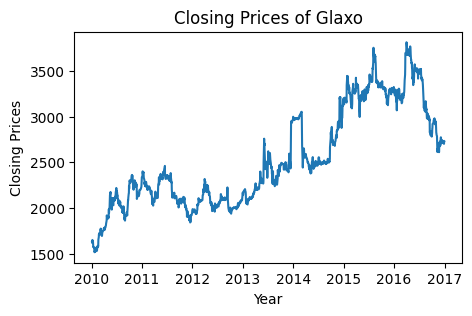

In [10]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
plt.plot(glaxo_df.index,glaxo_df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Prices')
plt.title('Closing Prices of Glaxo')
plt.show()

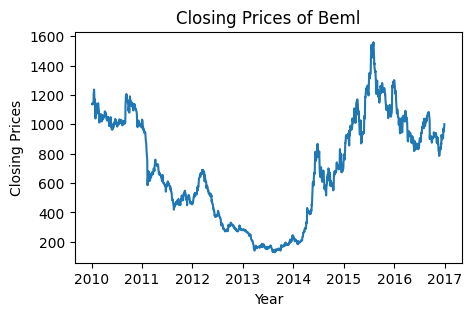

In [11]:
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
plt.plot(beml_df.index,beml_df.Close)
plt.xlabel('Year')
plt.ylabel('Closing Prices')
plt.title('Closing Prices of Beml')
plt.show()

In [12]:
#Adding a 'gain' column
beml_df['gain']=beml_df.Close.pct_change(periods=1)
beml_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [13]:
#Adding a 'gain' column
glaxo_df['gain']=glaxo_df.Close.pct_change(periods=1)
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [14]:
#dropping first row
glaxo_df=glaxo_df.dropna()
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


In [15]:
#Drop null value from Bem
beml_df.dropna(inplace=True)
beml_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162


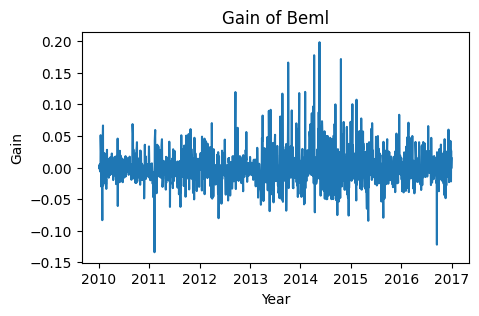

In [16]:
#Plot the gains
plt.figure(figsize=(5,3))
plt.plot(beml_df.index,beml_df.gain)
plt.xlabel('Year')
plt.ylabel('Gain')
plt.title('Gain of Beml')
plt.show()

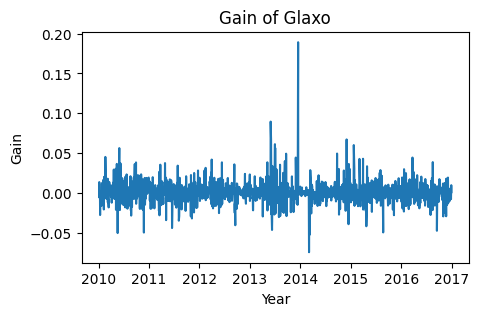

In [17]:
#Plot the gains
plt.figure(figsize=(5,3))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Year')
plt.ylabel('Gain')
plt.title('Gain of Glaxo')
plt.show()

In [18]:
glaxo_df.dropna(inplace=True)
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


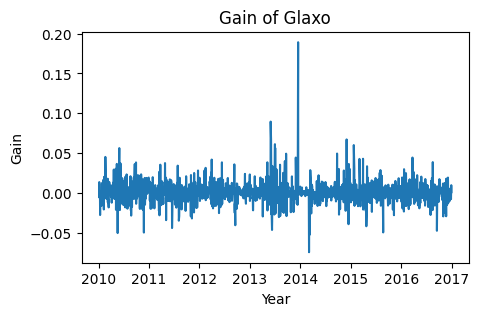

In [19]:
#Plot the gains
plt.figure(figsize=(5,3))
plt.plot(glaxo_df.index,glaxo_df.gain)
plt.xlabel('Year')
plt.ylabel('Gain')
plt.title('Gain of Glaxo')
plt.show()